# Datasets: Credit Card Data

Login: HUY0018

Name: Tuan Phong HUYNH

In [233]:
#import library:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics

In [234]:
#read the dataset:
df_full = pd.read_csv("CC GENERAL.csv")

# Display basic information of the dataset

In [235]:
#display the dataset:
df_full

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [236]:
#dataset infomation:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

=> it has 3 types mostly is float64 with 14 columns, int64 with 3 columns and object type with 1 column

In [237]:
#show first 5 rows
df_full.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [238]:
#show 20 last rows
df_full.tail(20)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8930,C19171,229.540018,1.000000,84.00,0.00,84.00,304.951421,1.000000,0.000000,0.833333,0.333333,4,6,1000.0,124.373736,89.753056,0.000000,6
8931,C19172,46.814144,0.833333,235.80,0.00,235.80,0.000000,0.833333,0.000000,0.666667,0.000000,0,6,1500.0,189.090274,89.496604,0.666667,6
8932,C19173,39.552396,1.000000,180.00,0.00,180.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,138.203240,86.564172,1.000000,6
8933,C19174,735.652303,1.000000,619.60,255.62,363.98,546.902403,1.000000,0.166667,0.833333,0.166667,5,16,1000.0,106.138603,337.294767,0.000000,6
8934,C19175,20.260716,0.833333,110.50,0.00,110.50,0.000000,0.666667,0.000000,0.500000,0.000000,0,4,1500.0,161.476789,65.936751,0.500000,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.90,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.000000,6
8936,C19177,108.977282,1.000000,712.50,0.00,712.50,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,605.716356,86.868595,0.750000,6
8937,C19178,163.001629,0.666667,0.00,0.00,0.00,274.440466,0.000000,0.000000,0.000000,0.166667,3,0,1000.0,117.738787,60.792450,0.000000,6
8938,C19179,78.818407,0.500000,0.00,0.00,0.00,1113.186078,0.000000,0.000000,0.000000,0.166667,7,0,1200.0,1397.770131,21.821194,0.333333,6
8939,C19180,728.352548,1.000000,734.40,734.40,0.00,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.000000,6


In [239]:
#find top 20 columns with most NaN values in descending order
df_full.isna().sum().sort_values(ascending=False).head(20)

,0
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1
CUST_ID,0
BALANCE,0
PRC_FULL_PAYMENT,0
PAYMENTS,0
PURCHASES_TRX,0
CASH_ADVANCE_TRX,0
CASH_ADVANCE_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


# Get summary of the dataset

In [240]:
#describe the dataset
df_full.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [241]:
#get the number of rows and columns of the dataset
df_full.shape

(8950, 18)

=> This dataset has 8950 rows and 18 columns in total

In [242]:
#get data types of the dataset
df_full.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


=> the dataset has 18 columns: 1 object (CUST_ID), 14 float64, and 3 int64. Most data are numeric, suitable for analysis or modeling. Address missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS

In [243]:
#find missing values
df_full.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


Two columns have missing values:
- CREDIT_LIMIT: 1 missing value.
- MINIMUM_PAYMENTS: 313 missing values.

=> All other columns have no missing values.

In [244]:
#handle missing values
df = df_full.dropna(subset=['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'])
df.tail(20)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8926,C19167,53.097361,0.833333,580.00,0.00,580.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,641.303466,52.453011,0.666667,6
8927,C19168,91.639086,1.000000,315.20,147.80,167.40,0.000000,1.000000,0.333333,0.833333,0.000000,0,8,1000.0,231.274641,86.344733,0.250000,6
8928,C19169,62.320028,1.000000,500.00,0.00,500.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,456.745027,73.848755,1.000000,6
8930,C19171,229.540018,1.000000,84.00,0.00,84.00,304.951421,1.000000,0.000000,0.833333,0.333333,4,6,1000.0,124.373736,89.753056,0.000000,6
8931,C19172,46.814144,0.833333,235.80,0.00,235.80,0.000000,0.833333,0.000000,0.666667,0.000000,0,6,1500.0,189.090274,89.496604,0.666667,6
8932,C19173,39.552396,1.000000,180.00,0.00,180.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,138.203240,86.564172,1.000000,6
8933,C19174,735.652303,1.000000,619.60,255.62,363.98,546.902403,1.000000,0.166667,0.833333,0.166667,5,16,1000.0,106.138603,337.294767,0.000000,6
8934,C19175,20.260716,0.833333,110.50,0.00,110.50,0.000000,0.666667,0.000000,0.500000,0.000000,0,4,1500.0,161.476789,65.936751,0.500000,6
8936,C19177,108.977282,1.000000,712.50,0.00,712.50,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,605.716356,86.868595,0.750000,6
8937,C19178,163.001629,0.666667,0.00,0.00,0.00,274.440466,0.000000,0.000000,0.000000,0.166667,3,0,1000.0,117.738787,60.792450,0.000000,6


=> NaN rows have been removed

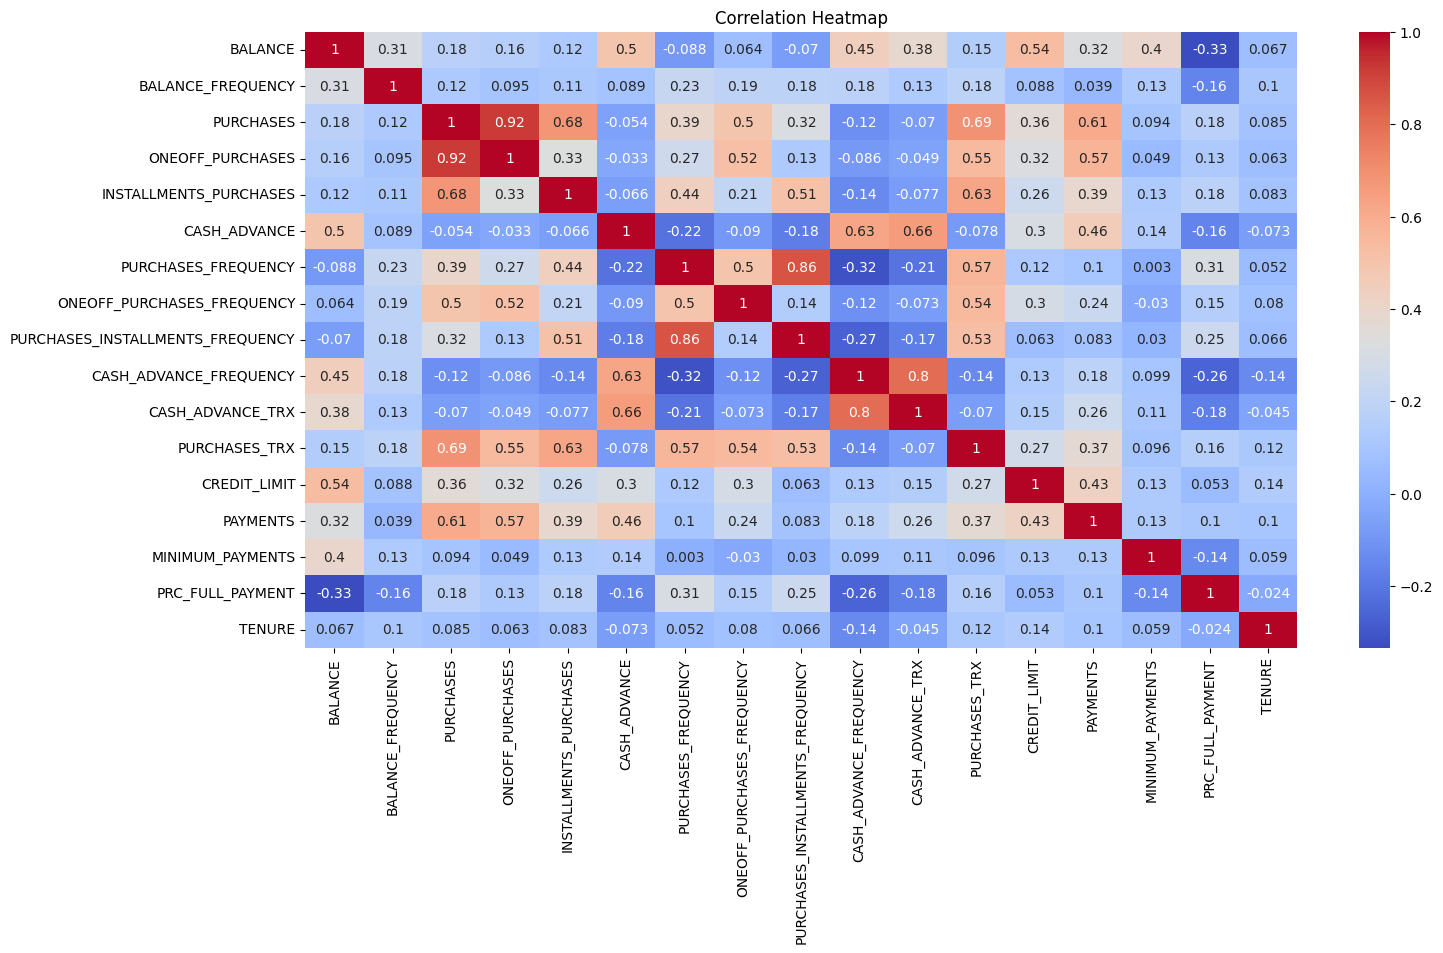

In [245]:
#colerrelation heatmap
plt.figure(figsize=(16, 8))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

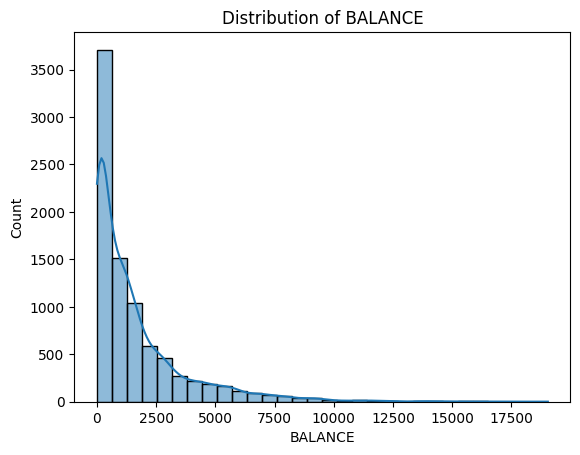

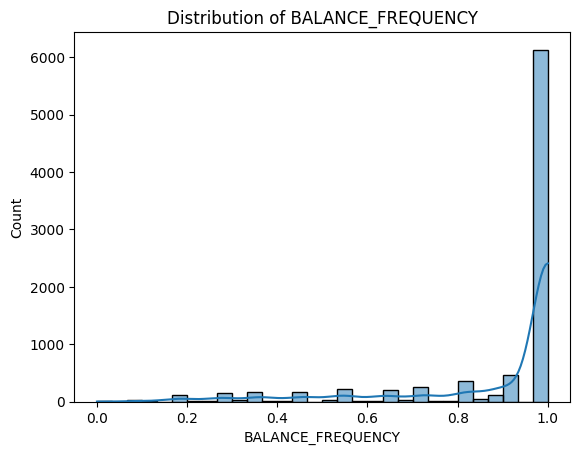

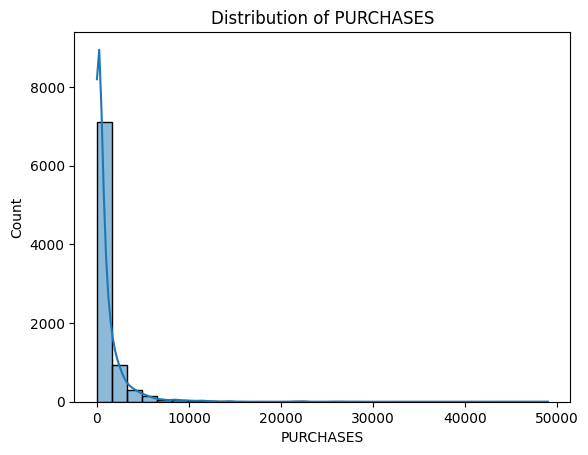

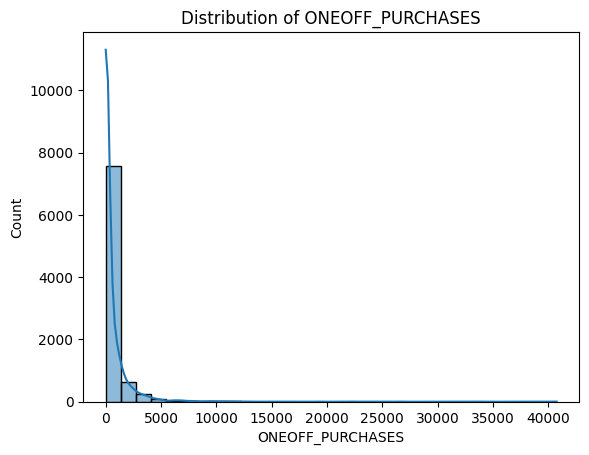

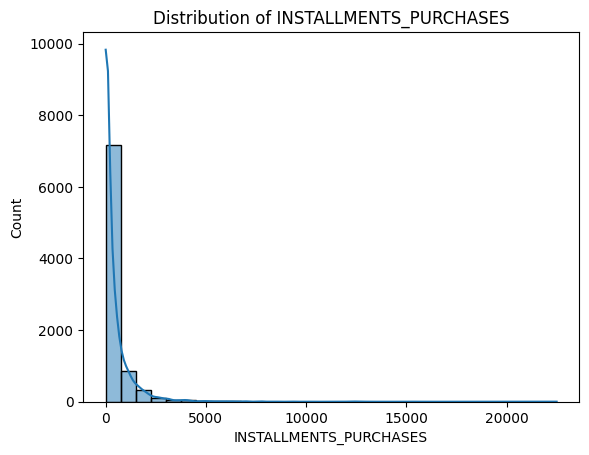

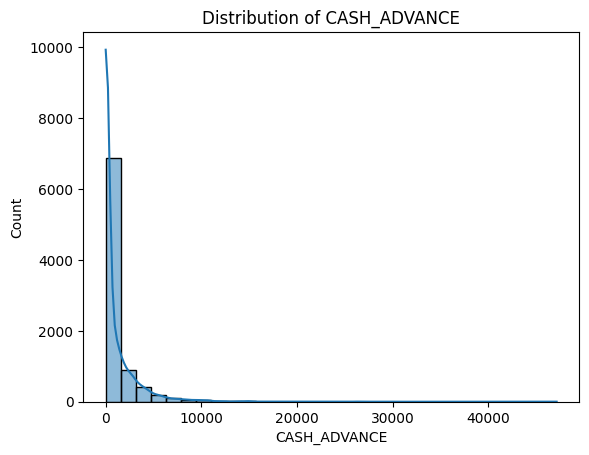

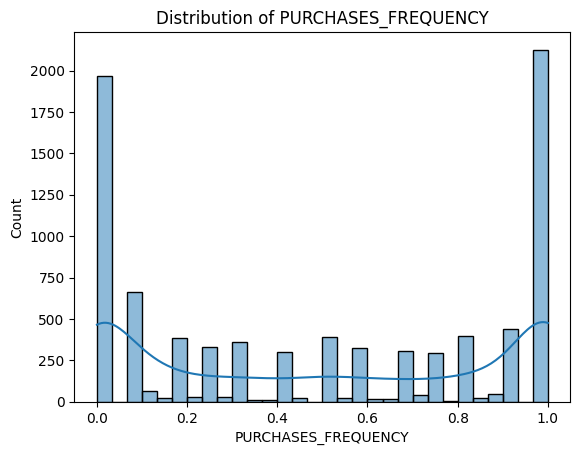

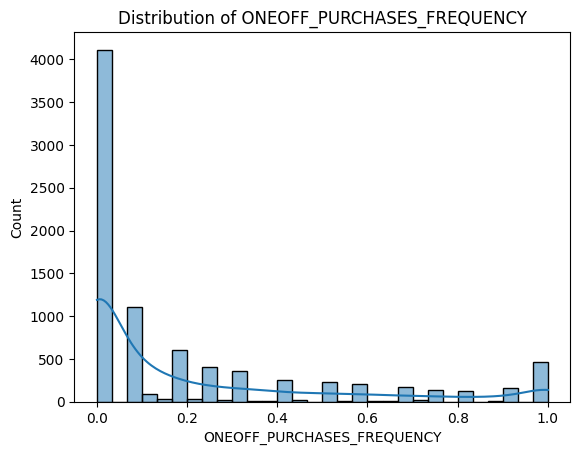

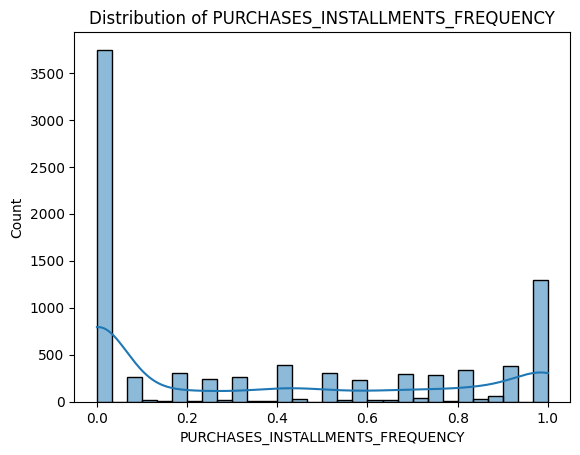

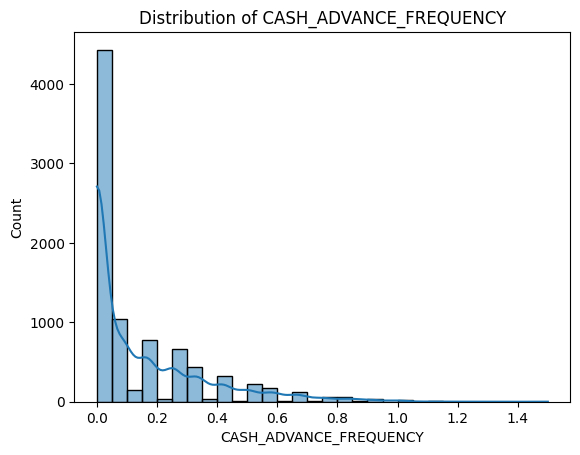

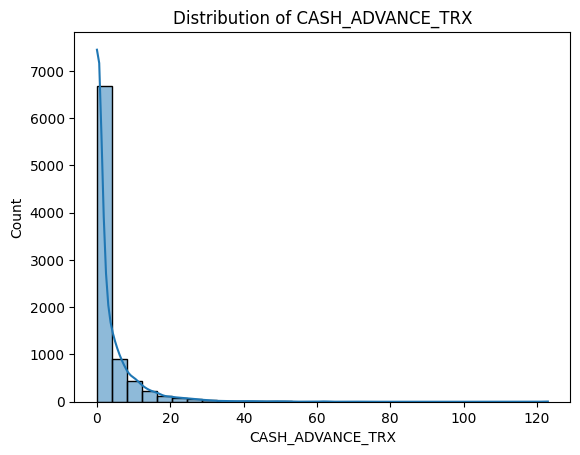

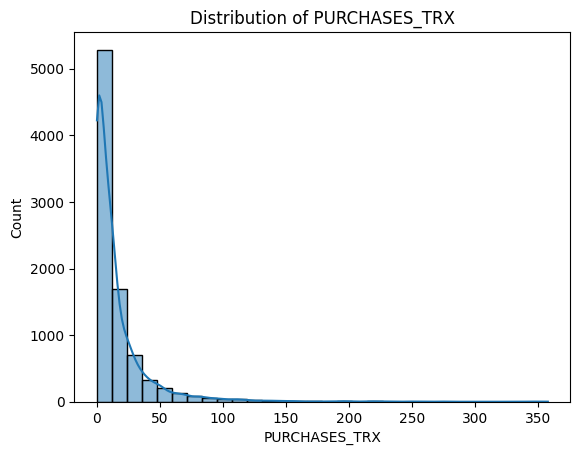

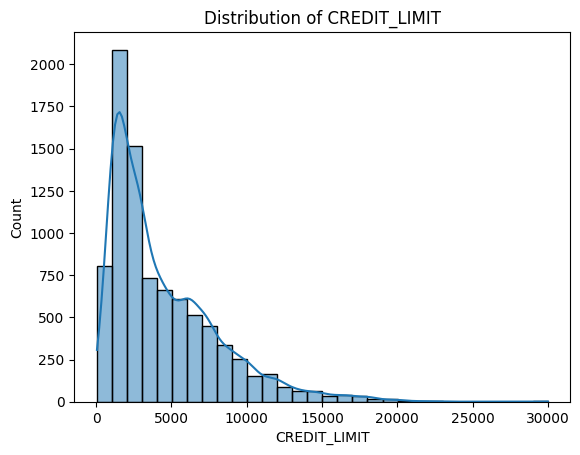

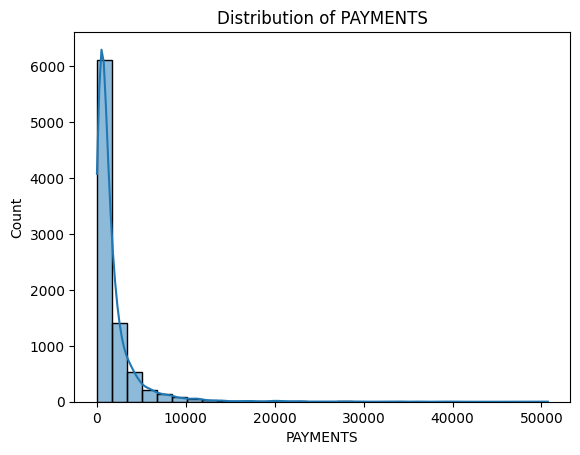

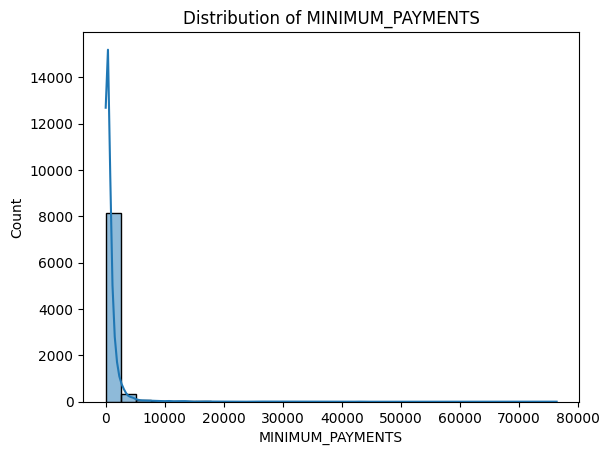

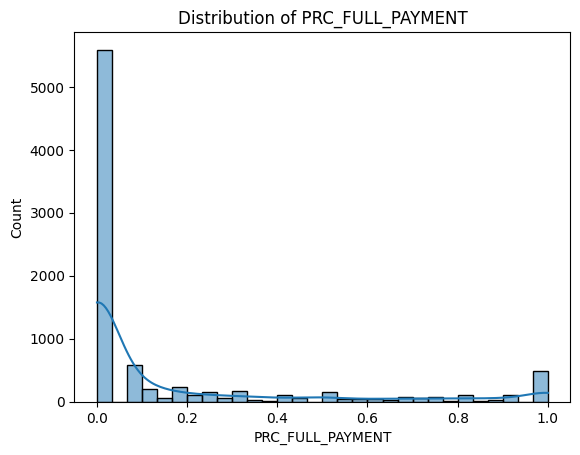

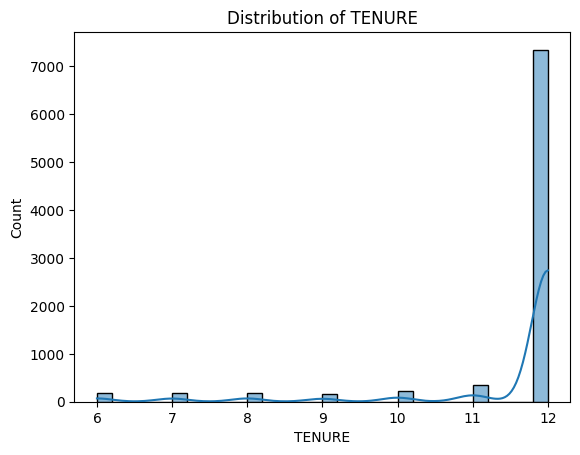

In [246]:
#distribution plots for numerical columns
for column in df.select_dtypes(include='number').columns:
    plt.figure()
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()

## Insight of the colerrelation heatmap and distribution plots

From the colerrelation heatmap:
- PURCHASES and ONEOFF_PURCHASES (0.92) are strongly correlated, as are CASH_ADVANCE and CASH_ADVANCE_TRX (0.80).
- CREDIT_LIMIT and BALANCE (0.54) show moderate correlation.
- TENURE has little to no correlation with other features, indicating low impact.

From the distribution plots:
- Most distributions (e.g., BALANCE, PURCHASES, CASH_ADVANCE) are heavily right-skewed, with a few extreme outliers. BALANCE_FREQUENCY and PURCHASES_FREQUENCY are slightly more balanced but still skewed.
- Data is concentrated at lower values; CREDIT_LIMIT shows tiered clustering. Majority of values are concentrated at the lower end for most features (e.g., PURCHASES).

# Preprocessing and clustering analysis


## K-Means Clustering

In [250]:
#initialize the scaler
scaler = MinMaxScaler()

#select only numerical features for scaling
numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features]

#fit and transform the numerical data
scaled_data = scaler.fit_transform(numerical_df)

#convert back to a dataset
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features, index=numerical_df.index)

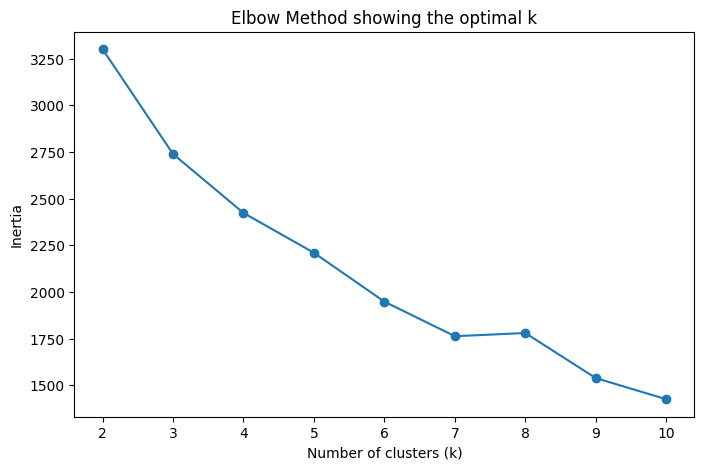

In [251]:
cluster_range = range(2, 11)
clustering_scores = []

for k in cluster_range:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(scaled_df)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(scaled_data, clustering.labels_)
    })

#extract data for plotting
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

#plot using the extracted data from the datatset
plt.figure(figsize=(8, 5))
plt.plot(df_clustering_scores.index, df_clustering_scores['sse'], marker='o')
plt.title('Elbow Method showing the optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()


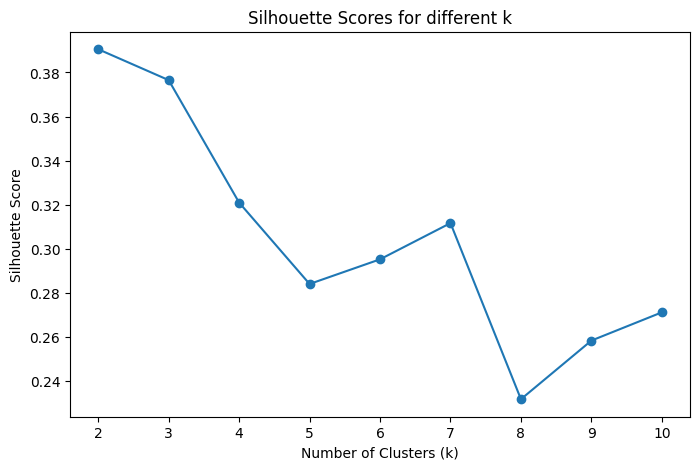

In [252]:
plt.figure(figsize=(8, 5))
plt.plot(df_clustering_scores.index, df_clustering_scores['silhouette'], marker='o')
plt.title('Silhouette Scores for different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.show()

### Insight of the plots:

From the Elbow method (optimal k):
- Around k = 8, where the inertia curve starts to flatten, suggesting 8 clusters as a good choice for segmentation.

From silhouette scores:
- The highest silhouette score is at k = 2 but is is decreased
- A moderate silhouette score is observed for k = 7 and k = 8, supporting the elbow method's suggestion.

=> k = 8 appears to be the optimal number of clusters, balancing both inertia and silhouette scores.

In [253]:
#initialize KMeans
optimal_k = 8
clustering = KMeans(n_clusters=optimal_k, random_state=42)
clustering.fit(scaled_df)

KMeans(random_state=42)

In [254]:
pd.Series(clustering.labels_).value_counts()

,count
4,2089
1,1827
7,1105
5,870
3,813
0,795
2,689
6,448


In [255]:
#get cluster centers in scaled form
cluster_centers = clustering.cluster_centers_

#inverse transform to get original scale
centers_unscaled = scaler.inverse_transform(cluster_centers)
cluster_centers_df = pd.DataFrame(centers_unscaled, columns=df.columns[:-1])
print("Cluster Centers (Original Scale):")
cluster_centers_df

Cluster Centers (Original Scale):


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,4597.297076,0.984823,180.292818,159.629396,20.791308,4035.634555,0.063792,0.045738,0.017683,0.474058,13.354717,1.372327,7403.464837,3100.813692,1848.484947,0.021445,11.830189
1,999.299263,0.945007,1088.779184,210.959628,878.489776,420.368390,0.951628,0.074630,0.912967,0.055995,1.281883,22.452107,3740.545853,1364.451157,959.033528,0.288794,11.481664
2,1510.702591,0.966976,1930.217300,1815.958578,114.258723,586.648129,0.811807,0.787415,0.103632,0.083292,1.941945,22.571843,5755.801557,2206.152987,671.843527,0.266619,11.789550
3,2334.256546,0.987158,4316.890578,2822.347700,1494.542878,719.048825,0.973591,0.779366,0.855798,0.100105,2.821648,61.362854,7522.201722,4244.158465,895.392580,0.266818,11.824108
4,1386.061360,0.962588,225.687798,203.820742,22.081455,750.937105,0.097031,0.074729,0.021557,0.136034,2.658688,1.979416,3112.861018,1020.147075,804.134321,0.021157,11.886070
5,134.808572,0.404940,399.001839,249.051713,150.030011,420.796299,0.216590,0.075341,0.131927,0.039636,0.936782,3.626437,4097.254789,1635.716336,167.689671,0.335305,11.812644
6,1383.547532,0.797437,290.982254,237.471250,53.511004,1859.310410,0.201942,0.109530,0.083138,0.280661,5.220982,2.772321,3179.464286,888.802377,451.805167,0.081065,7.330357
7,1607.590639,0.932906,845.800326,377.368715,469.194588,771.763426,0.598781,0.143565,0.487660,0.114030,3.004525,12.438009,4307.665798,1384.497339,926.197300,0.052686,11.857014


=> cluster center: provides insights into the typical characteristics of each cluster

In [256]:
#get numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns

#compute mean values for numeric columns per cluster
df['cluster_id'] = clustering.labels_
cluster_summary = df[numeric_cols].groupby(df['cluster_id']).mean()
cluster_summary

<ipython-input-256-512e24502071>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_id'] = clustering.labels_


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_id,,,,,,,,,,,,,,,,,
0,4597.297076,0.984823,180.292818,159.629396,20.791308,4035.634555,0.063792,0.045738,0.017683,0.474058,13.354717,1.372327,7403.464837,3100.813692,1848.484947,0.021445,11.830189
1,999.299263,0.945007,1088.779184,210.959628,878.489776,420.368390,0.951628,0.074630,0.912967,0.055995,1.281883,22.452107,3740.545853,1364.451157,959.033528,0.288794,11.481664
2,1510.702591,0.966976,1930.217300,1815.958578,114.258723,586.648129,0.811807,0.787415,0.103632,0.083292,1.941945,22.571843,5755.801557,2206.152987,671.843527,0.266619,11.789550
3,2334.256546,0.987158,4316.890578,2822.347700,1494.542878,719.048825,0.973591,0.779366,0.855798,0.100105,2.821648,61.362854,7522.201722,4244.158465,895.392580,0.266818,11.824108
4,1386.061360,0.962588,225.687798,203.820742,22.081455,750.937105,0.097031,0.074729,0.021557,0.136034,2.658688,1.979416,3112.861018,1020.147075,804.134321,0.021157,11.886070
5,134.808572,0.404940,399.001839,249.051713,150.030011,420.796299,0.216590,0.075341,0.131927,0.039636,0.936782,3.626437,4097.254789,1635.716336,167.689671,0.335305,11.812644
6,1383.547532,0.797437,290.982254,237.471250,53.511004,1859.310410,0.201942,0.109530,0.083138,0.280661,5.220982,2.772321,3179.464286,888.802377,451.805167,0.081065,7.330357
7,1607.590639,0.932906,845.800326,377.368715,469.194588,771.763426,0.598781,0.143565,0.487660,0.114030,3.004525,12.438009,4307.665798,1384.497339,926.197300,0.052686,11.857014


=> cluster summary : Provides the average values of all numeric features for each cluster.

<Axes: xlabel='cluster_id', ylabel='count'>

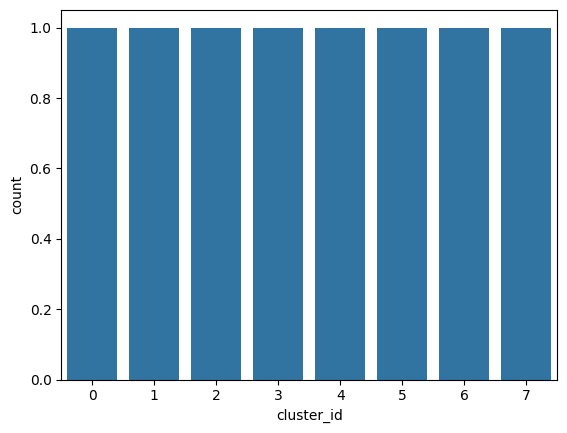

In [257]:
sns.countplot(data=cluster_summary, x='cluster_id')

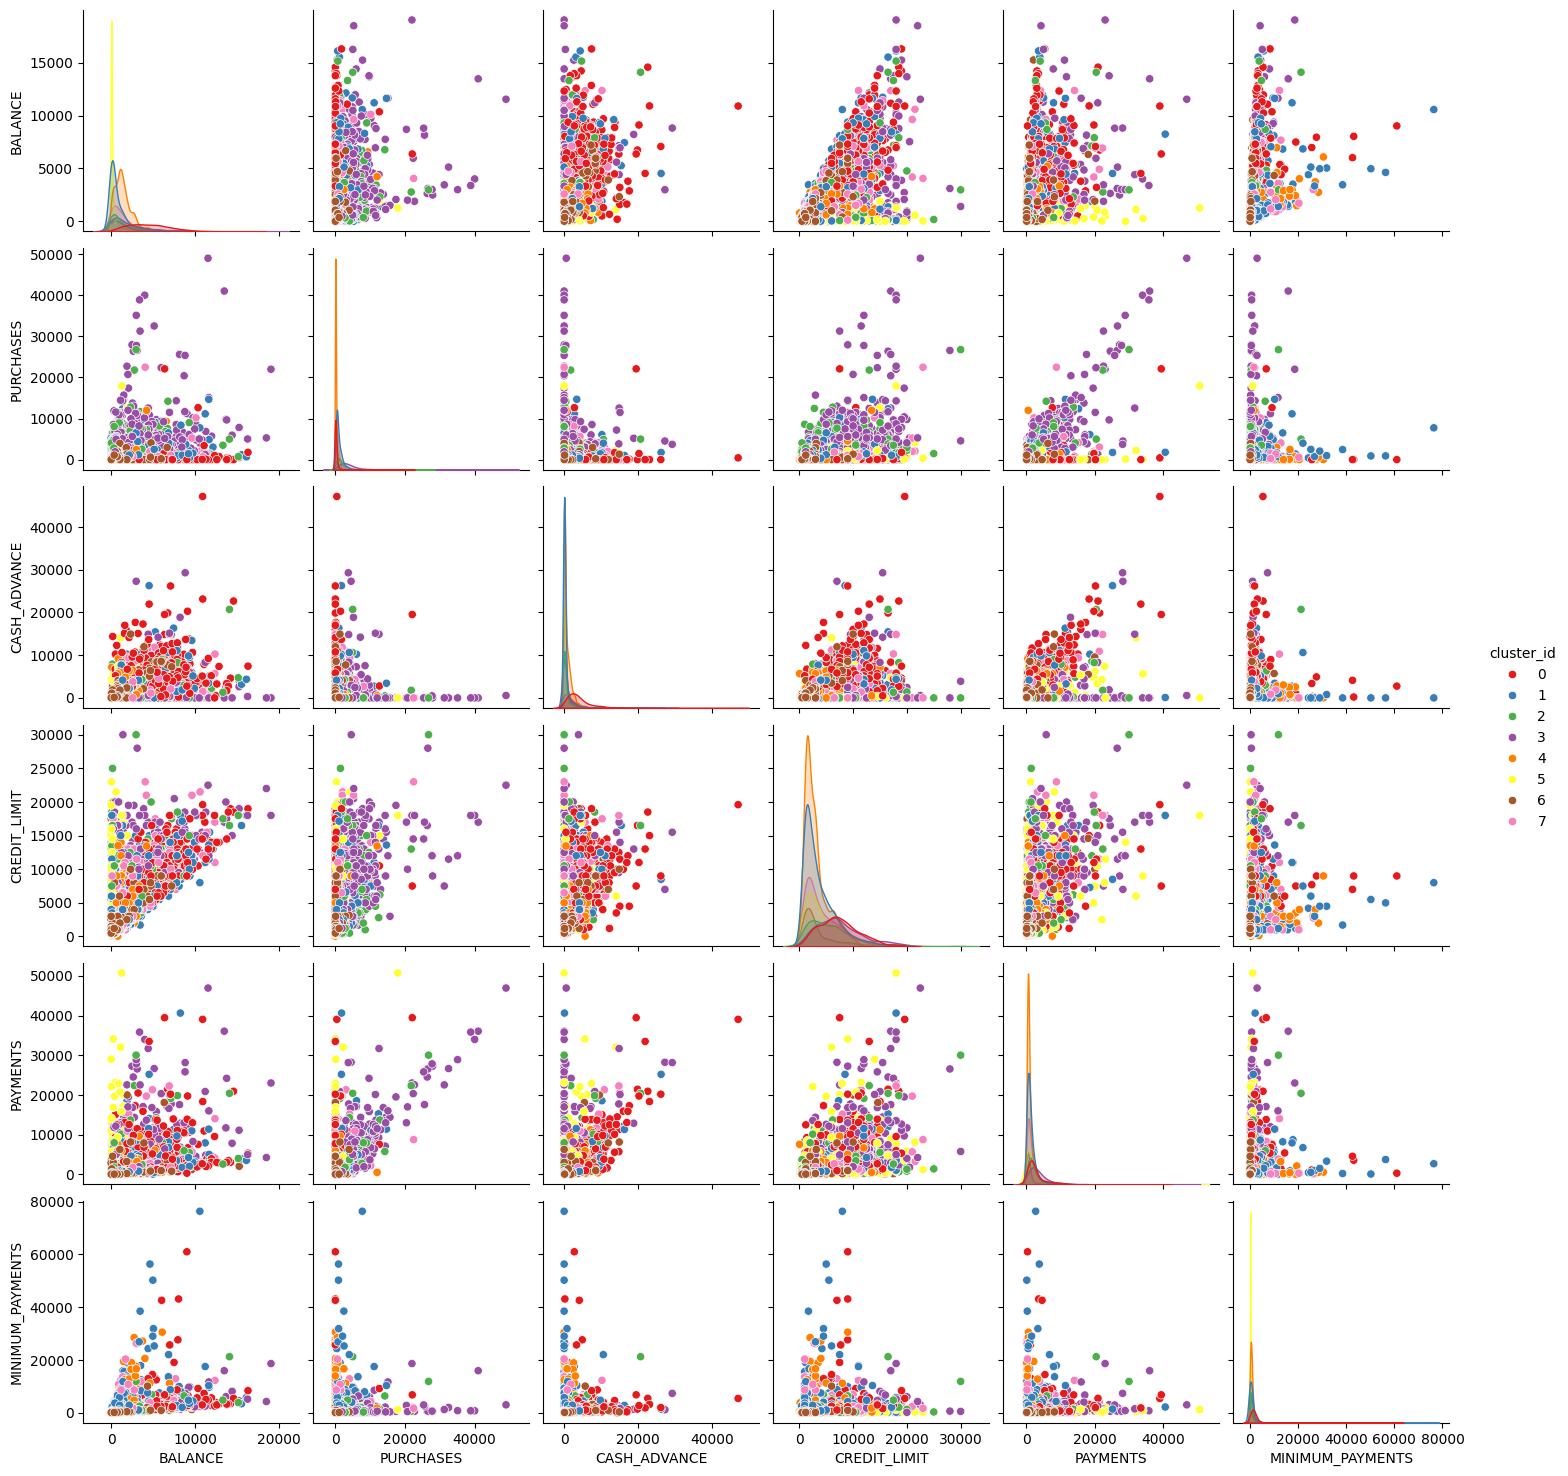

In [258]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "cluster_id"]
sns.pairplot(df[best_cols], hue="cluster_id", palette='Set1')
plt.show()

## Insight of 4 best pairs:

**1. BALANCE vs PURCHASES**

- CLuster 0 (red): purchases are low but balance is moderate, purchases are around 0, some are higher a bit approximately over 21000, likely inactive or cautious users with minimal spending.
- Cluster 1 (blue): both purchases and balance are moderate around 0 - over 10000, represents average users with balanced spending habits.
- Cluster 2 (green): balance between purchases and balance some almost reach 30000, indicates financially active users with a mix of spending and saving
- Cluster 3 (purple): both are high, distributed mainly around 10,000 some are reach to peak of the plot. Likely premium or high-spending users.
- Cluster 4 (orange): low scattered, but moderate purchases with moderate balances (around 10000). Represents consistent users with average spending.
- Cluster 5 (yellow): low scattered, but high purchases and balances with almost 20000. Heavy spenders maintaining high balances.
- Cluster 6 (brown): high balance but low purchases. most purchases around 5000. Likely cautious users focused on saving or using their card minimally for purchases.
- Cluster 7 (pink): moderate purchase and balance, mainly distributed about 10,000 drops. Represents balanced users with controlled spending.


**2. BALANCE vs CASH_ADVANCE**
- CLuster 0 (red): both balance and cash advance are likely high around 20000 drops, and only one rach to peak. Represents customers relying heavily on cash advances while maintaining high balances.
- Cluster 1 (blue): both are moderate, around 30000 drops. Indicates balanced financial behavior with occasional use of cash advances.
- Cluster 2 (green): both are moderate, but highest is 20000 for cash advance and around 13000 for balance. Suggests occasional cash advance users with moderate balance management.
- Cluster 3 (purple): both are high around 30000 for cash advance and 15000 for balance. Represents high-spending customers who also rely on significant cash advances.
- Cluster 4 (orange): low scattered, low balance around 5000 below but moderate cash advance 20000 below. Indicates users who rely more on cash advances despite maintaining low balances.
- Cluster 5 (yellow): low scattered, both low balance around 3000 around but moderate cash advance around 12000. Likely less active or infrequent users of financial services.
- Cluster 6 (brown): high balance, moderate cash advance around 15000 below. Represents cautious savers with occasional reliance on cash advances.
- Cluster 7 (pink): high balance around 10000 and moderate cash advance around 15000. Suggests financially stable users with controlled spending habits.

**3. BALANCE vs CREDIT_LIMIT**
- CLuster 0 (red): high balance and high credit limits, and both tend to increase both are around 15000 - 20000. Likely represents financially active customers with moderate-to-high spending power.
- Cluster 1 (blue): both are high and tending to increase approximately 15000 - 20000. Represents stable users with high spending power and controlled balance usage.
- Cluster 2 (green): both are high, highest for balance is almost reach to peak 15000 and for credit limit almost reach 30000. Indicates premium customers with significant financial activity and high creditworthiness.
- Cluster 3 (purple): both are high, highest for balance is almost reach to peak 15000 and for credit limit almost reach 30000. Represents high-spending users, possibly premium or riskier customers.
- Cluster 4 (orange): both are moderate around 15000 below for credit limits and 5000 below for balance. Represents conservative or lower-tier customers with limited financial activity.
- Cluster 5 (yellow): low balance but high credit limits balance is round 2000 below and highest of credit limit is almost reach 25000. Indicates credit-worthy users who do not fully utilize their available credit.
- Cluster 6 (brown): both are moderate around 15000 below for credit limits and 5000 below for balance. Represents cautious spenders with moderate financial engagement.
- Cluster 7 (pink): both are high, highest for balance is almost reach to peak 15000 and for credit limit almost reach 30000. Indicates premium or heavy-spending customers with significant financial resources.

**4. PURCHASES vs CASH_ADVANCE**
- CLuster 0 (red): high cash advance (around 30000 below, 1 rach to top) and minimal purchases (mostly below 2000 and one is over 20000). Likely cash-reliant customers with limited purchase activity.
- Cluster 1 (blue): moderate cash advance (below 20000  and reach over 25000) and minimal purchases (below 20000). Represents customers with balanced but limited use of both purchases and cash advances.
- Cluster 2 (green): moderate cash advance (below 20000  and reach over 25000) and high purchases (around below 30000). Represents financially active users with significant purchase activity alongside occasional reliance on cash advances.
- Cluster 3 (purple): high purchases (around 50000) and high cash advance (around 30000). Likely premium or high-risk users with substantial financial activity.
- Cluster 4 (orange): low scattered, low cash advance (around 10000) and low purchases (below 5000). Represents inactive or low-tier users with minimal engagement.
- Cluster 5 (yellow): low cash advance (around 0) and moderate purchases (around 20000). Indicates customers who rely heavily on purchases while avoiding cash advances.
- Cluster 6 (brown): moderate cash advance (around below 20000) and low purchases (around below 5000). Represents cautious users relying more on cash advances than purchases.
- Cluster 7 (pink): both are moderate around 20000. Likely balanced users with controlled financial activity.

**Summary**
- CLuster 0 (red): High balances and cash advances but minimal purchases.
Represents customers heavily relying on cash advances with limited spending activity. Likely cautious or inactive users.
- Cluster 1 (blue): Moderate balances, cash advances, and purchases.
Represents average users with balanced financial activity and occasional cash reliance.
- Cluster 2 (green): Moderate-to-high balances, purchases, and cash advances.
Indicates financially active customers with a mix of spending and occasional reliance on cash advances.
- Cluster 3 (purple): High balances, purchases, and cash advances.
Represents premium or high-spending users with substantial financial activity. Could also include high-risk customers.
- Cluster 4 (orange): Low balances and purchases, with moderate cash advances.
Represents inactive or lower-tier users who rely on cash advances despite minimal overall activity.
- Cluster 5 (yellow): Low balances and cash advances but moderate purchases.
Indicates credit-worthy customers who avoid cash advances and rely more on moderate purchase activity.
- Cluster 6 (brown): Moderate balances, credit limits, and cash advances, but low purchases. Represents cautious savers or conservative spenders relying occasionally on cash advances.
- Cluster 7 (pink): High balances, purchases, and credit limits with moderate cash advances. Represents premium or financially stable users with controlled financial behavior.

#Agglomerative Clustering

In [259]:
#initialize the Agglomerative Clustering model
agglomerative = AgglomerativeClustering(n_clusters=optimal_k)

#fit the model and predict cluster labels
aggcluster_labels = agglomerative.fit_predict(scaled_df)

#assign clusters to the data
df['agglo_cluster_id'] = aggcluster_labels

<ipython-input-259-1954f0ba5577>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agglo_cluster_id'] = aggcluster_labels


In [260]:
numeric_cols = df.select_dtypes(include=['number']).columns
agg_cluster_summary = df[numeric_cols].groupby(df['agglo_cluster_id']).mean()
print("Agglomerative Clustering Cluster Summary:")
agg_cluster_summary

Agglomerative Clustering Cluster Summary:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id,agglo_cluster_id
agglo_cluster_id,,,,,,,,,,,,,,,,,,,
0,2175.491910,0.957406,262.376766,199.203567,63.339943,1569.559454,0.126772,0.064944,0.060023,0.224510,5.342317,2.280390,4206.097095,1502.635946,1036.100221,0.023289,11.462729,3.617259,0.0
1,210.703424,0.430553,328.516294,206.207318,122.622386,588.883150,0.207192,0.064194,0.135029,0.050920,1.178458,3.511088,4024.835259,1584.749285,208.574264,0.269196,11.770855,5.022175,1.0
2,561.805860,0.961619,4841.959193,3744.294006,1097.665187,155.148514,0.913492,0.844389,0.487743,0.026461,0.743516,49.190202,7735.381189,4716.741204,328.981965,0.866983,11.959654,2.550432,2.0
3,1527.087849,0.932526,903.527783,157.486041,746.722200,675.001288,0.884174,0.051887,0.848209,0.090000,2.302876,20.726734,3906.345178,1467.931752,1478.124062,0.062445,11.956007,2.690355,3.0
4,1835.840722,0.974314,1425.623715,1231.842901,194.174392,778.868148,0.706844,0.609185,0.173105,0.117741,2.817680,18.998619,4803.261203,1775.046444,788.264503,0.053648,11.877072,3.708564,4.0
5,2494.935460,0.990372,3104.436439,1862.547372,1241.889066,789.705178,0.963073,0.638911,0.833851,0.101672,2.792617,50.716612,6724.627381,3169.264823,988.783718,0.071599,11.933768,2.781759,5.0
6,912.801460,0.865987,786.534832,388.575419,398.043212,1058.518963,0.800597,0.203585,0.589393,0.162926,3.340782,11.561453,2733.016760,810.436161,466.597086,0.229485,7.502793,3.181564,6.0
7,129.737840,0.925067,1058.782018,152.525471,907.286413,47.155823,0.893315,0.051130,0.854653,0.006375,0.121076,18.499253,3915.623726,1200.050690,213.730410,0.714489,11.844544,1.418535,7.0


<Axes: xlabel='agglo_cluster_id', ylabel='count'>

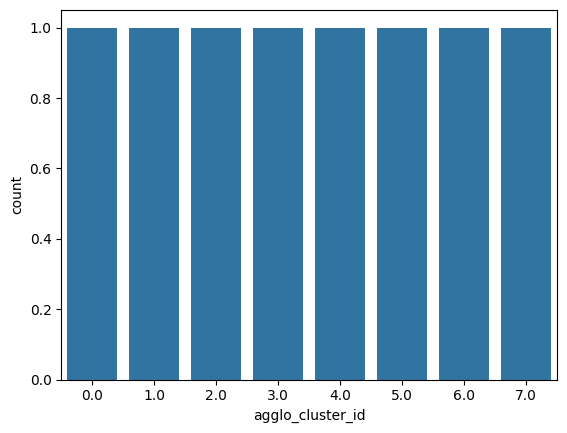

In [261]:
sns.countplot(data=agg_cluster_summary, x='agglo_cluster_id')

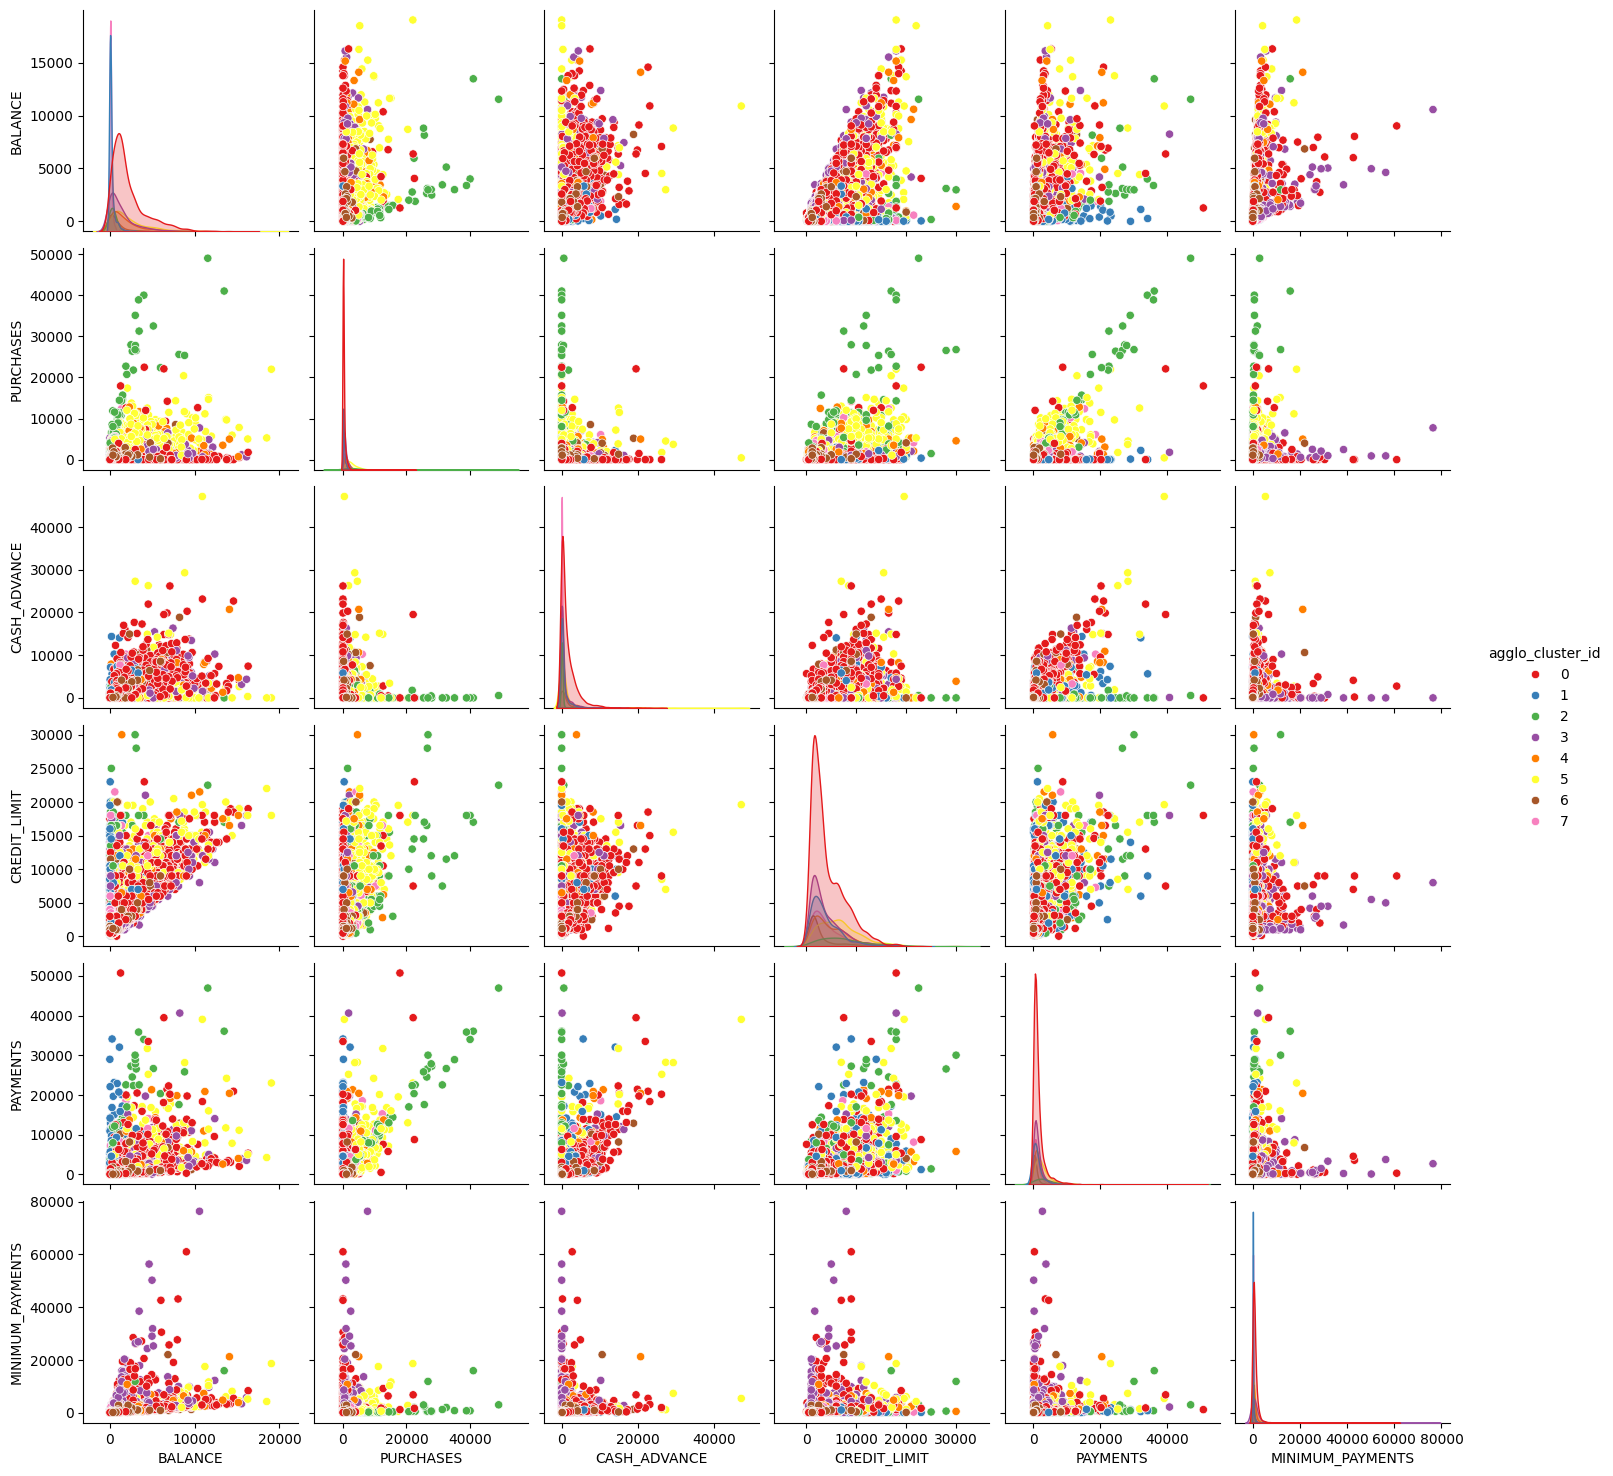

In [263]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "agglo_cluster_id"]
sns.pairplot(df[best_cols], hue="agglo_cluster_id", palette='Set1')
plt.show()

###Comparing both pairplot of k-means and agglomerative clustering, both are the same, so I try to compare it base on cluster_summary of k-means and agg_cluster_summary of agglomerative.

In [266]:
cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_id,,,,,,,,,,,,,,,,,
0,4597.297076,0.984823,180.292818,159.629396,20.791308,4035.634555,0.063792,0.045738,0.017683,0.474058,13.354717,1.372327,7403.464837,3100.813692,1848.484947,0.021445,11.830189
1,999.299263,0.945007,1088.779184,210.959628,878.489776,420.368390,0.951628,0.074630,0.912967,0.055995,1.281883,22.452107,3740.545853,1364.451157,959.033528,0.288794,11.481664
2,1510.702591,0.966976,1930.217300,1815.958578,114.258723,586.648129,0.811807,0.787415,0.103632,0.083292,1.941945,22.571843,5755.801557,2206.152987,671.843527,0.266619,11.789550
3,2334.256546,0.987158,4316.890578,2822.347700,1494.542878,719.048825,0.973591,0.779366,0.855798,0.100105,2.821648,61.362854,7522.201722,4244.158465,895.392580,0.266818,11.824108
4,1386.061360,0.962588,225.687798,203.820742,22.081455,750.937105,0.097031,0.074729,0.021557,0.136034,2.658688,1.979416,3112.861018,1020.147075,804.134321,0.021157,11.886070
5,134.808572,0.404940,399.001839,249.051713,150.030011,420.796299,0.216590,0.075341,0.131927,0.039636,0.936782,3.626437,4097.254789,1635.716336,167.689671,0.335305,11.812644
6,1383.547532,0.797437,290.982254,237.471250,53.511004,1859.310410,0.201942,0.109530,0.083138,0.280661,5.220982,2.772321,3179.464286,888.802377,451.805167,0.081065,7.330357
7,1607.590639,0.932906,845.800326,377.368715,469.194588,771.763426,0.598781,0.143565,0.487660,0.114030,3.004525,12.438009,4307.665798,1384.497339,926.197300,0.052686,11.857014


In [267]:
agg_cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id,agglo_cluster_id
agglo_cluster_id,,,,,,,,,,,,,,,,,,,
0,2175.491910,0.957406,262.376766,199.203567,63.339943,1569.559454,0.126772,0.064944,0.060023,0.224510,5.342317,2.280390,4206.097095,1502.635946,1036.100221,0.023289,11.462729,3.617259,0.0
1,210.703424,0.430553,328.516294,206.207318,122.622386,588.883150,0.207192,0.064194,0.135029,0.050920,1.178458,3.511088,4024.835259,1584.749285,208.574264,0.269196,11.770855,5.022175,1.0
2,561.805860,0.961619,4841.959193,3744.294006,1097.665187,155.148514,0.913492,0.844389,0.487743,0.026461,0.743516,49.190202,7735.381189,4716.741204,328.981965,0.866983,11.959654,2.550432,2.0
3,1527.087849,0.932526,903.527783,157.486041,746.722200,675.001288,0.884174,0.051887,0.848209,0.090000,2.302876,20.726734,3906.345178,1467.931752,1478.124062,0.062445,11.956007,2.690355,3.0
4,1835.840722,0.974314,1425.623715,1231.842901,194.174392,778.868148,0.706844,0.609185,0.173105,0.117741,2.817680,18.998619,4803.261203,1775.046444,788.264503,0.053648,11.877072,3.708564,4.0
5,2494.935460,0.990372,3104.436439,1862.547372,1241.889066,789.705178,0.963073,0.638911,0.833851,0.101672,2.792617,50.716612,6724.627381,3169.264823,988.783718,0.071599,11.933768,2.781759,5.0
6,912.801460,0.865987,786.534832,388.575419,398.043212,1058.518963,0.800597,0.203585,0.589393,0.162926,3.340782,11.561453,2733.016760,810.436161,466.597086,0.229485,7.502793,3.181564,6.0
7,129.737840,0.925067,1058.782018,152.525471,907.286413,47.155823,0.893315,0.051130,0.854653,0.006375,0.121076,18.499253,3915.623726,1200.050690,213.730410,0.714489,11.844544,1.418535,7.0


## Let's comapre 6 best columns BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS in each cluster of each method.

###cluster 0

**K-means:**
- BALANCE: 4597.297076
- PURCHASES: 180.292818
- CASH_ADVANCE: 4035.634555
- CREDIT_LIMIT: 7403.464837
- PAYMENTS: 3100.813692
- MINIMUM_PAYMENTS: 1848.484947

**Aggolimerative:**
- BALANCE: 2175.491910
- PURCHASES: 262.376766
- CASH_ADVANCE: 1569.559454
- CREDIT_LIMIT: 4206.097095
- PAYMENTS: 1502.635946
- MINIMUM_PAYMENTS: 1036.100221

=> K-means highlights higher activity levels, while Agglomerative groups more conservative users in this cluster.

###cluster 1

**K-means:**
- BALANCE: 999.299263
- PURCHASES:1088.779184
- CASH_ADVANCE: 420.368390
- CREDIT_LIMIT: 3740.545853
- PAYMENTS: 1364.451157
- MINIMUM_PAYMENTS: 959.033528

**Aggolimerative:**
- BALANCE: 210.703424
- PURCHASES: 328.516294
- CASH_ADVANCE: 588.883150
- CREDIT_LIMIT: 4024.835259
- PAYMENTS: 1584.749285
- MINIMUM_PAYMENTS: 208.574264

=> K-means identifies financially active users, while Agglomerative groups less engaged customers.

###cluster 2

**K-means:**
- BALANCE: 1510.702591
- PURCHASES: 328.516294
- CASH_ADVANCE: 588.883150
- CREDIT_LIMIT: 5755.801557
- PAYMENTS: 2206.152987
- MINIMUM_PAYMENTS: 671.843527

**Aggolimerative:**
- BALANCE: 561.805860
- PURCHASES: 4841.959193
- CASH_ADVANCE: 155.148514
- CREDIT_LIMIT: 7735.381189
- PAYMENTS: 4716.741204
- MINIMUM_PAYMENTS: 328.981965

=> K-means groups average users, whereas Agglomerative highlights premium customers.

###cluster 3

**K-means:**
- BALANCE: 2334.256546
- PURCHASES: 4316.890578
- CASH_ADVANCE: 719.048825
- CREDIT_LIMIT: 7522.201722
- PAYMENTS: 4244.158465
- MINIMUM_PAYMENTS: 895.392580

**Aggolimerative:**
- BALANCE: 1527.087849
- PURCHASES: 903.527783
- CASH_ADVANCE: 675.001288
- CREDIT_LIMIT: 3906.345178
- PAYMENTS: 1467.931752
- MINIMUM_PAYMENTS: 1478.124062

=> K-means focuses on premium spenders, while Agglomerative identifies more conservative users.

###cluster 4

**K-means:**
- BALANCE: 1386.061360
- PURCHASES: 225.687798
- CASH_ADVANCE: 750.937105
- CREDIT_LIMIT: 3112.861018
- PAYMENTS: 1020.147075
- MINIMUM_PAYMENTS: 804.134321

**Aggolimerative:**
- BALANCE: 1835.840722
- PURCHASES: 1425.623715
- CASH_ADVANCE: 778.868148
- CREDIT_LIMIT: 4803.261203
- PAYMENTS: 1775.046444
- MINIMUM_PAYMENTS: 788.264503

=> K-means captures inactive or cautious users, while Agglomerative identifies more active customers in this cluster.

###cluster 5

**K-means:**
- BALANCE: 134.808572
- PURCHASES: 399.001839
- CASH_ADVANCE: 420.796299
- CREDIT_LIMIT: 4097.254789
- PAYMENTS: 1635.716336
- MINIMUM_PAYMENTS: 167.689671

**Aggolimerative:**
- BALANCE: 2494.935460
- PURCHASES: 3104.436439
- CASH_ADVANCE: 789.705178
- CREDIT_LIMIT: 6724.627381
- PAYMENTS: 3169.264823
- MINIMUM_PAYMENTS: 988.783718

=> K-means captures inactive users, while Agglomerative focuses on high-value customers.

###cluster 6

**K-means:**
- BALANCE: 1383.547532
- PURCHASES: 290.982254
- CASH_ADVANCE: 1859.310410
- CREDIT_LIMIT: 3179.464286
- PAYMENTS: 888.802377
- MINIMUM_PAYMENTS: 451.805167

**Aggolimerative:**
- BALANCE: 912.801460
- PURCHASES: 786.534832
- CASH_ADVANCE: 1058.518963
- CREDIT_LIMIT: 2733.016760
- PAYMENTS: 810.436161
- MINIMUM_PAYMENTS: 466.597086

=> Both methods identify conservative users with moderate activity, but K-means highlights slightly higher balances.

###cluster 7

**K-means:**
- BALANCE: 1607.590639
- PURCHASES: 845.800326
- CASH_ADVANCE: 771.763426
- CREDIT_LIMIT: 4307.665798
- PAYMENTS: 1384.497339
- MINIMUM_PAYMENTS: 926.197300

**Aggolimerative:**
- BALANCE: 129.737840
- PURCHASES: 1058.782018
- CASH_ADVANCE: 47.155823
- CREDIT_LIMIT: 3915.623726
- PAYMENTS: 1200.050690
- MINIMUM_PAYMENTS: 213.730410

=> K-means captures balanced users with controlled financial behavior, while Agglomerative focuses on smaller-scale users.

##Overall:

- K-means: Highlights overall financial activity with a bias toward high-value and high-activity customers.

- Agglomerative: Offers more diverse and nuanced clusters, with better segmentation of both low-tier and premium users.



#Insights and Conclusions



Both K-Means and Agglomerative Clustering were applied to the credit card dataset, and the results show a reasonable degree of consistency between the two methods, with notable differences in cluster assignments and characteristics.

1. Overall Patterns: Both methods identify similar clusters in terms of overall trends, such as grouping users with high balances, purchases, or credit limits, and separating low-activity users.

2. Differences in Cluster Assignments:
- K-Means tends to create broader, more homogenous clusters, often grouping high-activity users together.
- Agglomerative Clustering creates finer, more nuanced distinctions between clusters, especially separating low-activity, moderate, and premium users.

3. Differences in Characteristics:
- K-Means emphasizes high-activity clusters with a focus on extreme values (e.g., high balances, cash advances).
- Agglomerative Clustering smooths these extremes, producing clusters that may represent smaller or more conservative users more effectively.



###Conclusion:

Overall, i see that both methods effectively segment credit card customers, but with different focuses. K-Means highlights high-value, high-risk, and inactive users for broad marketing or risk assessment. Agglomerative Clustering provides nuanced segmentation for targeted strategies based on specific spending patterns.